## Recommender systems group assignment
Everyone add their code to this notebook and make sure its well documented! If something already exists in the notebook, don't create it again. For example, you can already access to the data using the variables below:

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


movies_df = pd.read_csv("Data/movies.csv")
ratings_df = pd.read_csv("Data/ratings.csv")
tags_df = pd.read_csv("Data/tags.csv")

### Helper methods

In [81]:
def getMovieGenres(movie_id):
    movie_row = movies_df[movies_df['movieId'] == movie_id]

    if not movie_row.empty:
        genres_str = movie_row['genres'].iloc[0]
        
        genres_list = genres_str.split('|')
        
        return genres_list
    else:
        return []

def get_movie_name(movie_id):
    movie_row = movies_df[movies_df['movieId'] == movie_id]

    if not movie_row.empty:
        return movie_row['title'].iloc[0]
    else:
        return "Movie not in the list"


def get_user_ratings(user_id):
    user_ratings_df = ratings_df[ratings_df['userId'] == user_id]
    
    user_ratings = {}
    
    for index, row in user_ratings_df.iterrows():
        movie_id = row['movieId']
        rating = row['rating']
        user_ratings[movie_id] = rating
    
    return user_ratings


In [66]:
getMovieGenres(1)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [80]:
get_user_ratings(9)

{41.0: 3.0,
 187.0: 3.0,
 223.0: 4.0,
 371.0: 3.0,
 627.0: 3.0,
 922.0: 4.0,
 923.0: 5.0,
 1037.0: 2.0,
 1095.0: 4.0,
 1198.0: 5.0,
 1270.0: 5.0,
 1674.0: 4.0,
 1987.0: 2.0,
 2011.0: 3.0,
 2012.0: 4.0,
 2023.0: 3.0,
 2300.0: 5.0,
 2877.0: 3.0,
 2901.0: 2.0,
 3173.0: 2.0,
 3328.0: 3.0,
 3735.0: 3.0,
 4131.0: 1.0,
 4558.0: 1.0,
 4993.0: 5.0,
 5218.0: 4.0,
 5378.0: 3.0,
 5445.0: 4.0,
 5447.0: 4.0,
 5451.0: 4.0,
 5481.0: 5.0,
 5507.0: 1.0,
 5841.0: 1.0,
 5843.0: 3.0,
 5872.0: 3.0,
 5890.0: 4.0,
 5891.0: 1.0,
 5893.0: 4.0,
 5902.0: 5.0,
 5952.0: 5.0,
 5956.0: 4.0,
 5962.0: 1.0,
 5965.0: 4.0,
 5988.0: 2.0,
 6001.0: 4.0,
 6044.0: 2.0}

### Analyzing the dataset
We will start by plotting the number of evaluations (y axis) per movie(x axis)

<AxesSubplot:xlabel='index', ylabel='userId'>

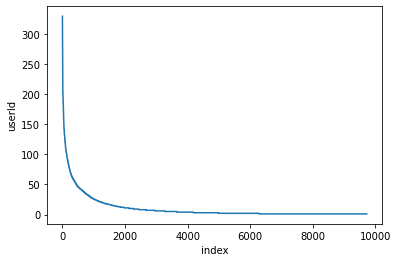

In [17]:
import seaborn as sns

count_ratings_df = ratings_df[['userId','movieId']].groupby(['movieId']).count()
count_ratings_df_ord = count_ratings_df.sort_values(by="userId", ascending=False).reset_index().reset_index()
sns.lineplot(data=count_ratings_df_ord, x='index', y='userId')

### Individual recommendations
The goal of a recsys is to predict whether a user will like or not a product based on the previous liked products of that same user


In [ ]:
# Rated movies by some user. (Movie with id 1 has a rating of 5 and so on...) 
user_ratings = {
    1: 5,
    3: 3,
    7: 5,
    15: 4,
    20: 2
}

#### Colaborative filtering
Recommends items based on user behavior and preferences, finding similarities between users or items

In [56]:
def individual_colaborative_filtering(user_ratings, movieId):
    
    

SyntaxError: incomplete input (3270687667.py, line 2)

#### Content based
Recommends items similar to those a user has shown interest in, based on item features.


In [73]:
def individual_content_based(user_ratings, movie_id):
    return score

In [95]:
def test_individual_content_based(user_id):
    rated_movies = get_user_ratings(user_id)
    actual_ratings = []  # List to store actual ratings
    predicted_ratings = []  # List to store predicted ratings

    for rated_movie_id, rating in rated_movies.items():
        # Makes a copy of the user ratings dictionary excluding the current item
        filtered_user_ratings = {movie_id: user_rating for movie_id, user_rating in rated_movies.items() if movie_id != rated_movie_id}

        movie_name = get_movie_name(rated_movie_id)

        prediction = individual_content_based(filtered_user_ratings, rated_movie_id)

        actual_ratings.append(rating)
        predicted_ratings.append(prediction)

        # prediction and actual rating
        # print(f"Prediction for {movie_name} = {prediction}, Actual rating = {rating}")

    # Calculate statistics
    actual_ratings = np.array(actual_ratings)
    predicted_ratings = np.array(predicted_ratings)
    prediction_difference = actual_ratings - predicted_ratings
    avg_prediction_difference = np.mean(prediction_difference)
    std_deviation_difference = np.std(prediction_difference)

    plt.figure(figsize=(10, 6))
    plt.scatter(actual_ratings, predicted_ratings, c='b', marker='o')
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title('Actual vs. Predicted Ratings')
    plt.grid(True)
    plt.show()

    print(f"Average Prediction Difference: {avg_prediction_difference}")
    print(f"Standard Deviation of Prediction Difference: {std_deviation_difference}")


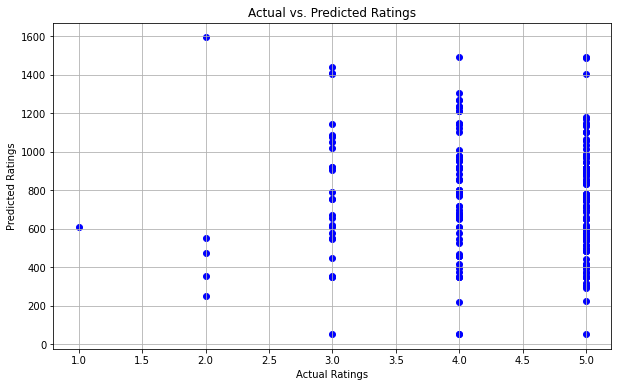

Average Prediction Difference: -743.9008620689655
Standard Deviation of Prediction Difference: 296.8321155583456


In [94]:
test_individual_content_based(1)

### Group recommendations

In [ ]:
#Use the previous format for the user ratings. (In this case, a list of dictionaries)
def groupal_recommendations(list_user_ratings):
    

### Explanation of the recommendations made by the algorithms
Explain why your algorithm recommends those items to users. Note: easier to do with content based recsys

### Evaluation of the resulting explanations.
The method below receives a user id and returns the list of movies rated by the user and whether it is relevant for them (The user scored  3 or more). We will use it as a metric to evaluate our recsys

In [46]:
def get_user_movie_relevance(user_id, ratings_df, movies_df):
    user_ratings = ratings_df[ratings_df['userId'] == user_id]

    # Extract movie IDs and their corresponding relevance (1 for 3 stars or more, 0 for less than 3 stars)
    movie_ids = user_ratings['movieId'].tolist()
    relevance = [1 if rating >= 3 else 0 for rating in user_ratings['rating']]

    return movie_ids, relevance

In [53]:
user_id_to_find = 4
movie_ids, relevance = get_user_movie_relevance(user_id_to_find, ratings_df, movies_df)
user_movie_relevance_df = pd.DataFrame({'movieId': movie_ids, 'Relevant': relevance})

display(user_movie_relevance_df)


,movieId,Relevant
0,21,1
1,32,0
2,45,1
3,47,0
4,52,1
...,...,...
211,4765,1
212,4881,1
213,4896,1
214,4902,1


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

train_df, test_df = train_test_split(ratings_df, test_size=0.2)


test_df['relevant'] = (test_df['rating'] >= 3).astype(int)

test_userId_movieId = test_df[['userId'], ['movieId']]
test_df['predicted_relevant'] = predict(test_userId_movieId)

y_test = list(test_df['relevant'])
y_pred = list(test_df['predicted_relevant'])
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", fscore)


NameError: name 'individual_colaborative_filtering' is not defined